In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [388]:
# load in datasets
conversion_new_load_import = "final_clean_imports.csv"
conversion_new_load_export = "final_clean_exports.csv"

# read in csv

new_import_df = pd.read_csv(conversion_new_load_import)
new_export_df = pd.read_csv(conversion_new_load_export)

# see if it works

new_import_df.head()

,Unnamed: 0,Unnamed: 0.1,Commodity,Country,UNIT_DESC,Year,AMOUNT,Metric Tons
0,0,30128,Beef,Argentina,KG,2006,137101.0,137.101
1,1,30129,Beef,Argentina,KG,2006,87009.0,87.009
2,2,30150,Beef,Argentina,KG,2006,9386.0,9.386
3,3,30151,Beef,Argentina,KG,2006,19475.0,19.475
4,4,30152,Beef,Argentina,KG,2006,122693.0,122.693


In [389]:
#group exports by country and year
summary_country_exports = new_export_df.groupby(["Country","Year"]).sum().reset_index()
summary_country_exports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,520149,24099437,6.971755e+05,21276.777788
1,Argentina,2007,429226,21334124,1.509824e+06,50093.451525
2,Argentina,2008,399269,18925406,8.081837e+05,26772.920599
3,Argentina,2009,215271,10629624,3.856750e+05,12562.097925
4,Argentina,2010,1172034,41546741,4.027077e+06,103482.865695


In [390]:
#data munge and convert to percent change
summary_export_pivot = summary_country_exports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_export_pct = summary_export_pivot.pct_change()
summary_export_pct

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,NaN
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


In [391]:
#data munge and convert to percent change
summary_export_pivot = summary_country_exports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_export_pct = summary_export_pivot.pct_change()
summary_export_pct

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,NaN
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


In [392]:
#group imports by country and year
summary_country_imports = new_import_df.groupby(["Country","Year"]).sum().reset_index()
summary_country_imports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06
1,Argentina,2007,30083,17998645,1.715963e+08,6.316710e+06
2,Argentina,2008,45504,18750702,1.390987e+08,5.112003e+06
3,Argentina,2009,71905,21202413,1.087845e+08,3.992219e+06
4,Argentina,2010,72326,14458465,1.070546e+08,3.923230e+06


In [393]:
#data munge and convert to percent change
summary_import_pivot = summary_country_imports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_import_pct = summary_import_pivot.pct_change()
summary_import_pct

Country,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kingdom
Year,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.192718,0.009843,-0.492449,NaN,-0.610613,-0.488134,NaN,0.0,0.153532,2.081172,0.137898,NaN,0.154928,0.082090
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,NaN,0.0,-0.036204,-0.731545,-0.204057,NaN,0.005786,-0.013669
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,NaN,0.0,-0.063439,-0.032049,0.135787,NaN,-0.040746,0.264801
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,NaN,0.0,0.172179,-0.702514,0.464830,NaN,0.127193,0.022107
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,NaN,0.0,0.075216,-0.954303,0.373189,NaN,-0.083048,0.051416
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,NaN,0.0,0.267775,16.869376,0.449106,NaN,0.075659,0.188516
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,NaN,0.0,0.036933,6.386284,-0.003730,NaN,0.166616,0.274949
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,NaN,0.0,0.140652,1.538943,0.227116,NaN,0.873080,0.106668


In [394]:
summary_import_pct

Country,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kingdom
Year,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.192718,0.009843,-0.492449,NaN,-0.610613,-0.488134,NaN,0.0,0.153532,2.081172,0.137898,NaN,0.154928,0.082090
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,NaN,0.0,-0.036204,-0.731545,-0.204057,NaN,0.005786,-0.013669
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,NaN,0.0,-0.063439,-0.032049,0.135787,NaN,-0.040746,0.264801
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,NaN,0.0,0.172179,-0.702514,0.464830,NaN,0.127193,0.022107
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,NaN,0.0,0.075216,-0.954303,0.373189,NaN,-0.083048,0.051416
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,NaN,0.0,0.267775,16.869376,0.449106,NaN,0.075659,0.188516
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,NaN,0.0,0.036933,6.386284,-0.003730,NaN,0.166616,0.274949
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,NaN,0.0,0.140652,1.538943,0.227116,NaN,0.873080,0.106668


In [395]:
# Create the pandas DataFrame 
argentina_import = pd.DataFrame(summary_import_pct, columns = ['Argentina'])
argentina_import

,Argentina
Year,
2006,NaN
2007,-0.192718
2008,-0.190718
2009,-0.219050
2010,-0.017281
2011,-0.025124
2012,-0.947309
2013,0.949274
2014,-0.551902


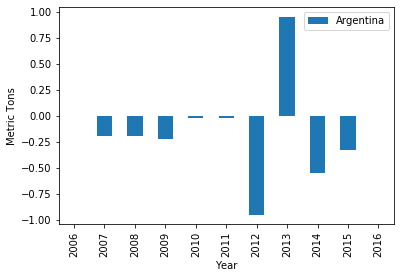

<Figure size 432x288 with 0 Axes>

In [396]:
# Create a bar chart based off of the group series from before
argentina_bar_chart = argentina_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
argentina_bar_chart.set_xlabel("Year")
argentina_bar_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_argentina",bbox_inches="tight")
plt.show()
plt.tight_layout()

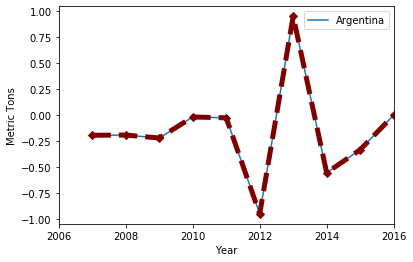

In [397]:
# Create a bar chart based off of the group series from before
argentina_line_chart = argentina_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = argentina_import.index
y_axis = argentina_import
# Set the xlabel and ylabel using class methods
argentina_line_chart.set_xlabel("Year")
argentina_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_argentina_line",bbox_inches="tight")

In [398]:
# Create the pandas DataFrame 
australia_import = pd.DataFrame(summary_import_pct, columns = ['Australia'])
australia_import

,Australia
Year,
2006,NaN
2007,0.009843
2008,-0.242639
2009,0.162863
2010,-0.263164
2011,-0.172490
2012,0.366182
2013,-0.023424
2014,0.650670


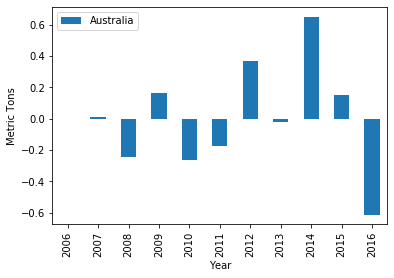

<Figure size 432x288 with 0 Axes>

In [399]:
# Create a bar chart based off of the group series from before
australia_chart = australia_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
australia_chart.set_xlabel("Year")
australia_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_australia",bbox_inches="tight")
plt.show()
plt.tight_layout()

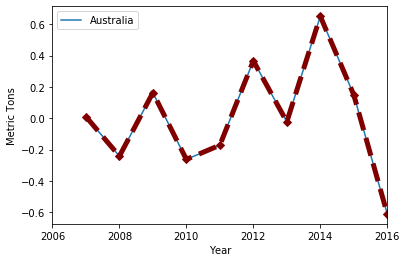

In [400]:
# Create a bar chart based off of the group series from before
australia_chart = australia_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = australia_import.index
y_axis = australia_import
# Set the xlabel and ylabel using class methods
australia_chart.set_xlabel("Year")
australia_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_australia_line",bbox_inches="tight")

In [401]:
# Create the pandas DataFrame 
china_import = pd.DataFrame(summary_import_pct, columns = ['China (Mainland)'])
china_import

,China (Mainland)
Year,
2006,NaN
2007,-0.492449
2008,1.357808
2009,-0.601025
2010,0.107886
2011,0.074418
2012,0.063481
2013,-0.262903
2014,2.381967


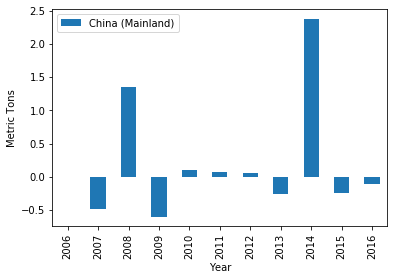

<Figure size 432x288 with 0 Axes>

In [402]:
# Create a bar chart based off of the group series from before
china_chart = china_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
china_chart.set_xlabel("Year")
china_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_china",bbox_inches="tight")
plt.show()
plt.tight_layout()

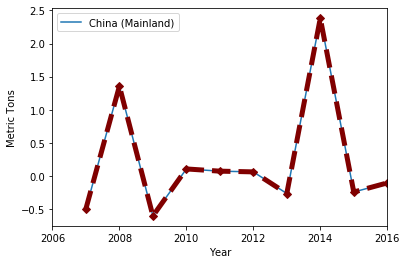

In [403]:
# Create a bar chart based off of the group series from before
china_chart = china_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = china_import.index
y_axis = china_import
# Set the xlabel and ylabel using class methods
china_chart.set_xlabel("Year")
china_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_china_line",bbox_inches="tight")

In [404]:
# Create the pandas DataFrame 
colombia_import = pd.DataFrame(summary_import_pct, columns = ['Colombia'])
colombia_import

,Colombia
Year,
2006,NaN
2007,NaN
2008,0.000000
2009,0.000000
2010,-0.997630
2011,0.000000
2012,636.053437
2013,0.000000
2014,0.000000


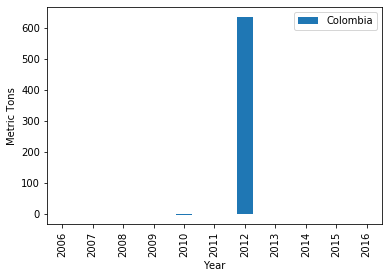

<Figure size 432x288 with 0 Axes>

In [405]:
# Create a bar chart based off of the group series from before
colombia_chart = colombia_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
colombia_chart.set_xlabel("Year")
colombia_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_colombia",bbox_inches="tight")
plt.show()
plt.tight_layout()

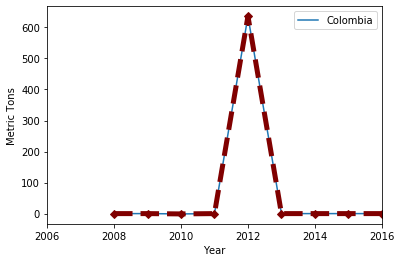

In [406]:
# Create a bar chart based off of the group series from before
colombia_chart = colombia_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = colombia_import.index
y_axis = colombia_import
# Set the xlabel and ylabel using class methods
colombia_chart.set_xlabel("Year")
colombia_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_colombia_line",bbox_inches="tight")

In [407]:
# Create the pandas DataFrame 
france_import = pd.DataFrame(summary_import_pct, columns = ['France'])
france_import

,France
Year,
2006,NaN
2007,-0.610613
2008,5.876003
2009,-0.455420
2010,1.085058
2011,-0.113016
2012,1.640965
2013,-0.349474
2014,0.312964


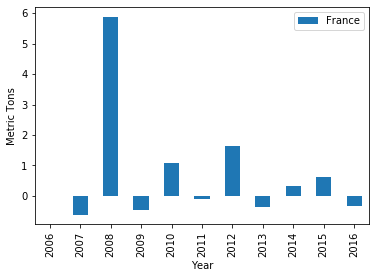

<Figure size 432x288 with 0 Axes>

In [408]:
# Create a bar chart based off of the group series from before
france_chart = france_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
france_chart.set_xlabel("Year")
france_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_france",bbox_inches="tight")
plt.show()
plt.tight_layout()

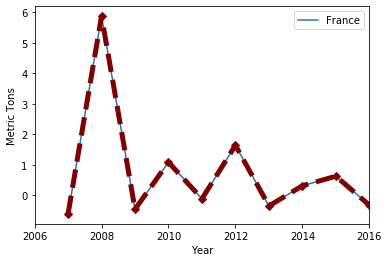

In [409]:
# Create a bar chart based off of the group series from before
france_chart = france_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = france_import.index
y_axis = france_import
# Set the xlabel and ylabel using class methods
france_chart.set_xlabel("Year")
france_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_france_line",bbox_inches="tight")

In [410]:
# Create the pandas DataFrame 
germany_import = pd.DataFrame(summary_import_pct, columns = ['Germany, Fed. Republic'])
germany_import

,"Germany, Fed. Republic"
Year,
2006,NaN
2007,-0.488134
2008,-0.022143
2009,0.194351
2010,0.161526
2011,0.300321
2012,-0.124193
2013,0.172456
2014,0.426241


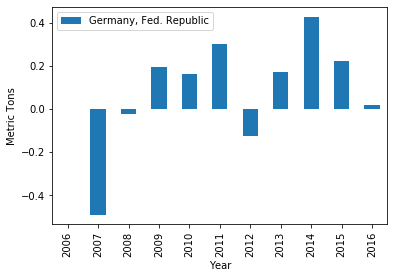

<Figure size 432x288 with 0 Axes>

In [411]:
# Create a bar chart based off of the group series from before
germany_chart = germany_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
germany_chart.set_xlabel("Year")
germany_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_germany",bbox_inches="tight")
plt.show()
plt.tight_layout()

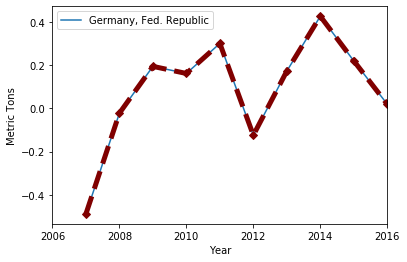

In [412]:
# Create a bar chart based off of the group series from before
germany_chart = germany_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = germany_import.index
y_axis = germany_import
# Set the xlabel and ylabel using class methods
germany_chart.set_xlabel("Year")
germany_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_germany_line",bbox_inches="tight")

In [413]:
# Create the pandas DataFrame 
greece_import = pd.DataFrame(summary_import_pct, columns = ['Greece'])
greece_import

,Greece
Year,
2006,NaN
2007,NaN
2008,NaN
2009,NaN
2010,NaN
2011,NaN
2012,NaN
2013,NaN
2014,NaN


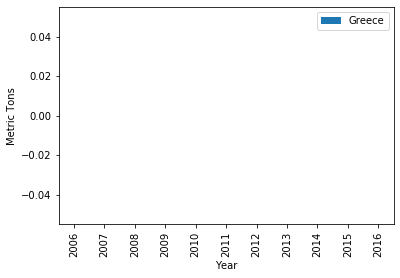

<Figure size 432x288 with 0 Axes>

In [414]:
# Create a bar chart based off of the group series from before
greece_chart = greece_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
greece_chart.set_xlabel("Year")
greece_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_greece",bbox_inches="tight")
plt.show()
plt.tight_layout()

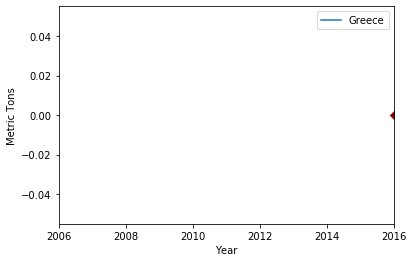

In [415]:
# Create a bar chart based off of the group series from before
greece_chart = greece_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = greece_import.index
y_axis = greece_import
# Set the xlabel and ylabel using class methods
greece_chart.set_xlabel("Year")
greece_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_greece_line",bbox_inches="tight")

In [416]:
# Create the pandas DataFrame 
india_import = pd.DataFrame(summary_import_pct, columns = ['India'])
india_import

,India
Year,
2006,NaN
2007,0.0
2008,0.0
2009,0.0
2010,0.0
2011,0.0
2012,0.0
2013,0.0
2014,0.0


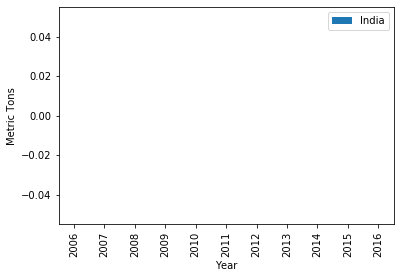

<Figure size 432x288 with 0 Axes>

In [417]:
# Create a bar chart based off of the group series from before
india_chart = india_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
india_chart.set_xlabel("Year")
india_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_india",bbox_inches="tight")
plt.show()
plt.tight_layout()

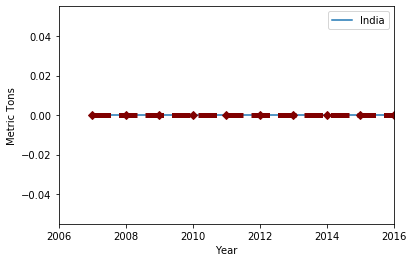

In [418]:
# Create a bar chart based off of the group series from before
india_chart = india_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = india_import.index
y_axis = india_import
# Set the xlabel and ylabel using class methods
india_chart.set_xlabel("Year")
india_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_india_line",bbox_inches="tight")

In [419]:
# Create the pandas DataFrame 
italy_import = pd.DataFrame(summary_import_pct, columns = ['Italy'])
italy_import

,Italy
Year,
2006,NaN
2007,0.153532
2008,-0.036204
2009,-0.063439
2010,0.172179
2011,0.075216
2012,0.267775
2013,0.036933
2014,0.140652


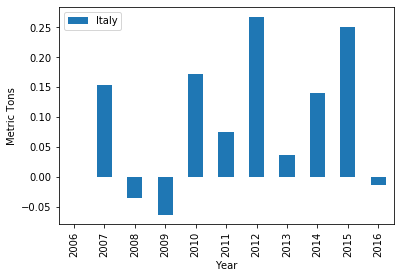

<Figure size 432x288 with 0 Axes>

In [420]:
# Create a bar chart based off of the group series from before
italy_chart = italy_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
italy_chart.set_xlabel("Year")
italy_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_italy",bbox_inches="tight")
plt.show()
plt.tight_layout()

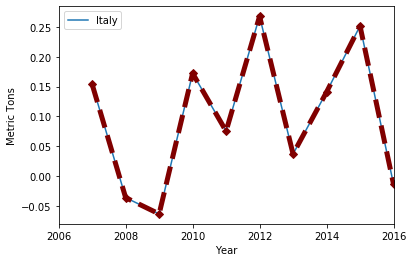

In [421]:
# Create a bar chart based off of the group series from before
italy_chart = italy_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = italy_import.index
y_axis = italy_import
# Set the xlabel and ylabel using class methods
italy_chart.set_xlabel("Year")
italy_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_italy_line",bbox_inches="tight")

In [422]:
# Create the pandas DataFrame 
japan_import = pd.DataFrame(summary_import_pct, columns = ['Japan'])
japan_import

,Japan
Year,
2006,NaN
2007,2.081172
2008,-0.731545
2009,-0.032049
2010,-0.702514
2011,-0.954303
2012,16.869376
2013,6.386284
2014,1.538943


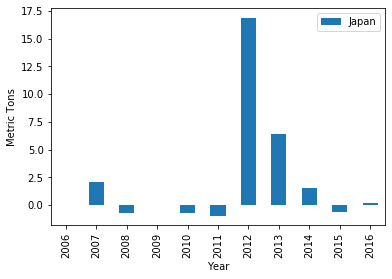

<Figure size 432x288 with 0 Axes>

In [423]:
# Create a bar chart based off of the group series from before
japan_chart = japan_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
japan_chart.set_xlabel("Year")
japan_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_japan",bbox_inches="tight")
plt.show()
plt.tight_layout()

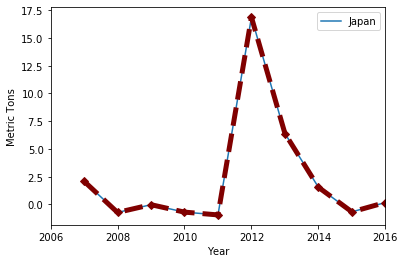

In [424]:
# Create a bar chart based off of the group series from before
japan_chart = japan_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = japan_import.index
y_axis = japan_import
# Set the xlabel and ylabel using class methods
japan_chart.set_xlabel("Year")
japan_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_japan_line",bbox_inches="tight")

In [425]:
# Create the pandas DataFrame 
mexico_import = pd.DataFrame(summary_import_pct, columns = ['Mexico'])
mexico_import

,Mexico
Year,
2006,NaN
2007,0.137898
2008,-0.204057
2009,0.135787
2010,0.464830
2011,0.373189
2012,0.449106
2013,-0.003730
2014,0.227116


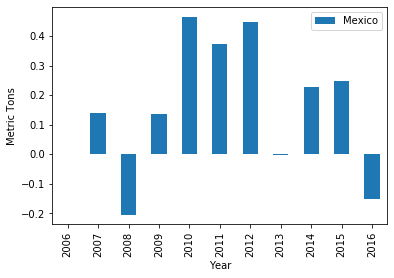

<Figure size 432x288 with 0 Axes>

In [426]:
# Create a bar chart based off of the group series from before
mexico_chart = mexico_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
mexico_chart.set_xlabel("Year")
mexico_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_mexico",bbox_inches="tight")
plt.show()
plt.tight_layout()

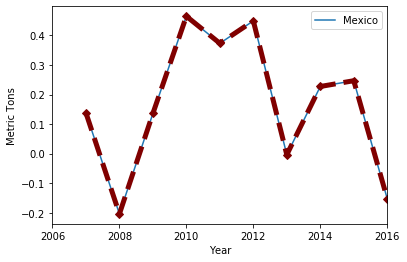

In [427]:
# Create a bar chart based off of the group series from before
mexico_chart = mexico_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = mexico_import.index
y_axis = mexico_import
# Set the xlabel and ylabel using class methods
mexico_chart.set_xlabel("Year")
mexico_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_mexico_line",bbox_inches="tight")

In [428]:
# Create the pandas DataFrame 
peru_import = pd.DataFrame(summary_import_pct, columns = ['Peru'])
peru_import

,Peru
Year,
2006,NaN
2007,NaN
2008,NaN
2009,NaN
2010,NaN
2011,NaN
2012,NaN
2013,NaN
2014,NaN


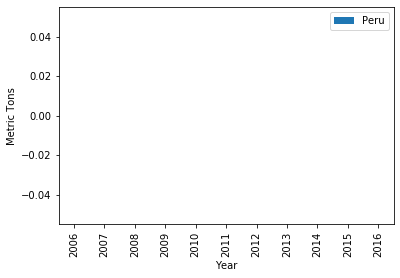

<Figure size 432x288 with 0 Axes>

In [429]:
# Create a bar chart based off of the group series from before
peru_chart = peru_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
peru_chart.set_xlabel("Year")
peru_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_peru",bbox_inches="tight")
plt.show()
plt.tight_layout()

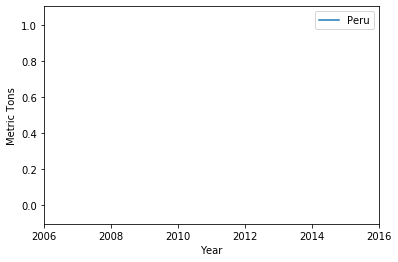

In [430]:
# Create a bar chart based off of the group series from before
peru_chart = peru_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = peru_import.index
y_axis = peru_import
# Set the xlabel and ylabel using class methods
peru_chart.set_xlabel("Year")
peru_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_peru_line",bbox_inches="tight")

In [431]:
# Create the pandas DataFrame 
poland_import = pd.DataFrame(summary_import_pct, columns = ['Poland'])
poland_import

,Poland
Year,
2006,NaN
2007,0.154928
2008,0.005786
2009,-0.040746
2010,0.127193
2011,-0.083048
2012,0.075659
2013,0.166616
2014,0.873080


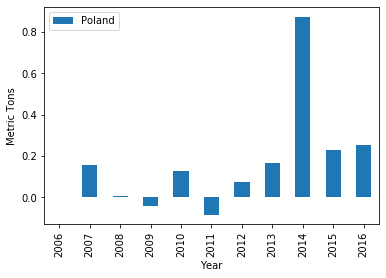

<Figure size 432x288 with 0 Axes>

In [432]:
# Create a bar chart based off of the group series from before
poland_chart = poland_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
poland_chart.set_xlabel("Year")
poland_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_poland",bbox_inches="tight")
plt.show()
plt.tight_layout()

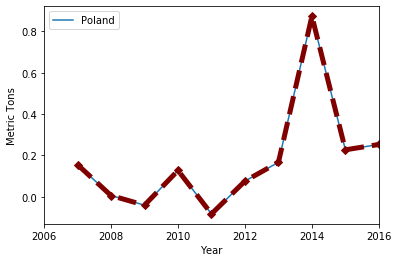

In [433]:
# Create a bar chart based off of the group series from before
poland_chart = poland_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = poland_import.index
y_axis = poland_import
# Set the xlabel and ylabel using class methods
poland_chart.set_xlabel("Year")
poland_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_poland_line",bbox_inches="tight")

In [434]:
# Create the pandas DataFrame 
uk_import = pd.DataFrame(summary_import_pct, columns = ['United Kingdom'])
uk_import

,United Kingdom
Year,
2006,NaN
2007,0.082090
2008,-0.013669
2009,0.264801
2010,0.022107
2011,0.051416
2012,0.188516
2013,0.274949
2014,0.106668


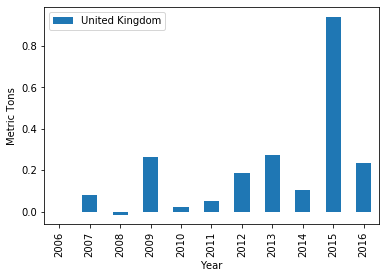

<Figure size 432x288 with 0 Axes>

In [435]:
# Create a bar chart based off of the group series from before
uk_chart = uk_import.plot(kind='bar')

# Set the xlabel and ylabel using class methods
uk_chart.set_xlabel("Year")
uk_chart.set_ylabel("Metric Tons")

plt.savefig("../imports_countries_graphs/imports_uk",bbox_inches="tight")
plt.show()
plt.tight_layout()

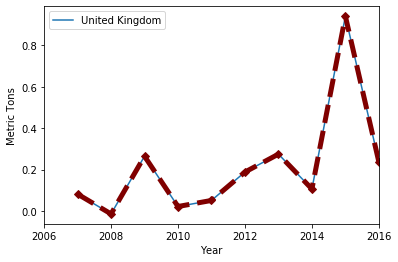

In [436]:
# Create a bar chart based off of the group series from before
uk_chart = uk_import.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = uk_import.index
y_axis = uk_import
# Set the xlabel and ylabel using class methods
uk_chart.set_xlabel("Year")
uk_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../imports_countries_graphs/imports_uk_line",bbox_inches="tight")

In [437]:
# Create the pandas DataFrame 
argentina_export = pd.DataFrame(summary_export_pct, columns = ['Argentina'])
argentina_export

,Argentina
Year,
2006,NaN
2007,1.354372
2008,-0.465541
2009,-0.530791
2010,7.237706
2011,-0.146520
2012,-0.974728
2013,1.275118
2014,6.242104


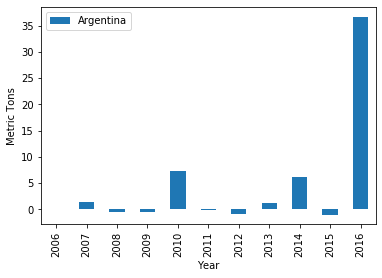

<Figure size 432x288 with 0 Axes>

In [438]:
# Create a bar chart based off of the group series from before
argentina_export_chart = argentina_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
argentina_export_chart.set_xlabel("Year")
argentina_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_argentina",bbox_inches="tight")
plt.show()
plt.tight_layout()

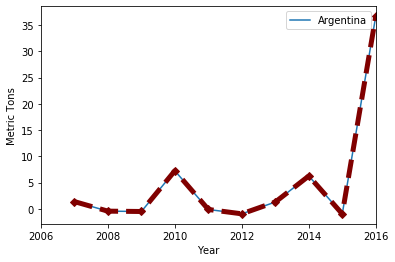

In [439]:
# Create a bar chart based off of the group series from before
argentina_line_chart = argentina_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = argentina_export.index
y_axis = argentina_export
# Set the xlabel and ylabel using class methods
argentina_line_chart.set_xlabel("Year")
argentina_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_argentina_line",bbox_inches="tight")

In [440]:
# Create the pandas DataFrame 
australia_export = pd.DataFrame(summary_export_pct, columns = ['Australia'])
australia_export

,Australia
Year,
2006,NaN
2007,0.155372
2008,0.402362
2009,0.178960
2010,0.170893
2011,0.272214
2012,0.070008
2013,-0.170253
2014,-0.082296


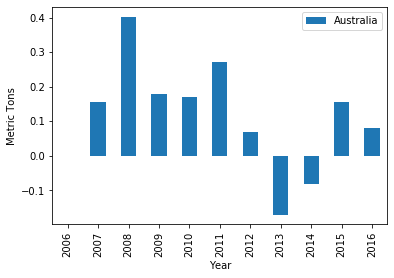

<Figure size 432x288 with 0 Axes>

In [441]:
# Create a bar chart based off of the group series from before
australia_export_chart = australia_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
australia_export_chart.set_xlabel("Year")
australia_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_australia",bbox_inches="tight")
plt.show()
plt.tight_layout()

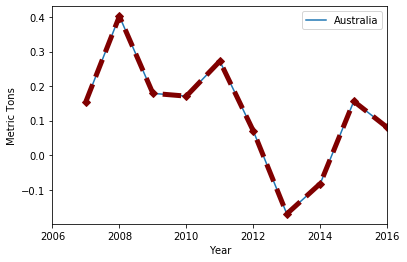

In [442]:
# Create a bar chart based off of the group series from before
australia_line_chart = australia_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = australia_export.index
y_axis = australia_export
# Set the xlabel and ylabel using class methods
australia_line_chart.set_xlabel("Year")
australia_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_australia_line",bbox_inches="tight")

In [443]:
# Create the pandas DataFrame 
bulgaria_export = pd.DataFrame(summary_export_pct, columns = ['Bulgaria'])
bulgaria_export

,Bulgaria
Year,
2006,NaN
2007,-0.133336
2008,2.669045
2009,-0.884159
2010,0.000000
2011,0.000000
2012,0.000000
2013,-0.999231
2014,-0.506400


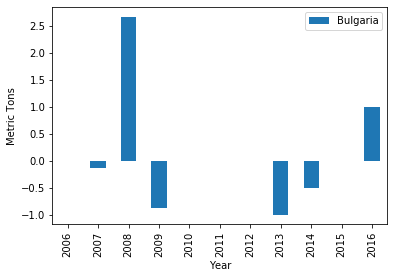

<Figure size 432x288 with 0 Axes>

In [444]:
# Create a bar chart based off of the group series from before
bulgaria_export_chart = bulgaria_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
bulgaria_export_chart.set_xlabel("Year")
bulgaria_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_bulgaria",bbox_inches="tight")
plt.show()
plt.tight_layout()

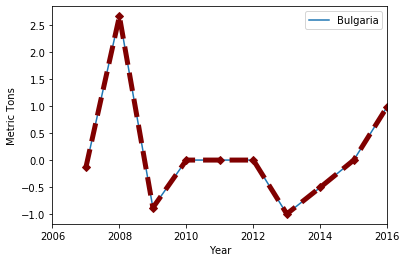

In [445]:
# Create a bar chart based off of the group series from before
bulgaria_line_chart = bulgaria_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = bulgaria_export.index
y_axis = bulgaria_export
# Set the xlabel and ylabel using class methods
bulgaria_line_chart.set_xlabel("Year")
bulgaria_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_bulgaria_line",bbox_inches="tight")

In [446]:
# Create the pandas DataFrame 
china_export = pd.DataFrame(summary_export_pct, columns = ['China (Mainland)'])
china_export

,China (Mainland)
Year,
2006,NaN
2007,0.397168
2008,0.265514
2009,-0.286323
2010,-0.585284
2011,1.554098
2012,0.050441
2013,-0.078777
2014,-0.260055


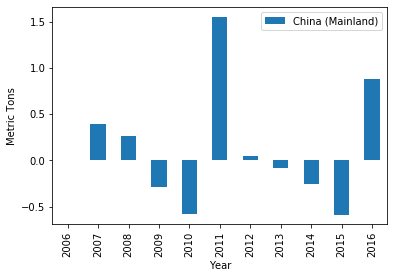

<Figure size 432x288 with 0 Axes>

In [447]:
# Create a bar chart based off of the group series from before
china_export_chart = china_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
china_export_chart.set_xlabel("Year")
china_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_china",bbox_inches="tight")
plt.show()
plt.tight_layout()

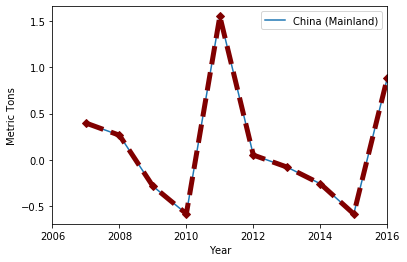

In [448]:
# Create a bar chart based off of the group series from before
china_line_chart = china_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = china_export.index
y_axis = china_export
# Set the xlabel and ylabel using class methods
china_line_chart.set_xlabel("Year")
china_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_china_line",bbox_inches="tight")

In [449]:
# Create the pandas DataFrame 
colombia_export = pd.DataFrame(summary_export_pct, columns = ['Colombia'])
colombia_export

,Colombia
Year,
2006,NaN
2007,0.088714
2008,0.070145
2009,0.156915
2010,0.345242
2011,0.050647
2012,0.315799
2013,0.436060
2014,0.209983


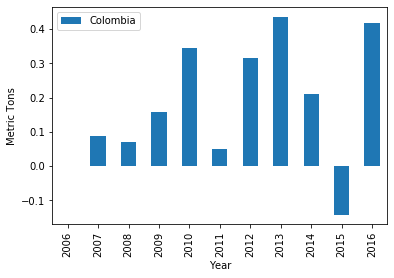

<Figure size 432x288 with 0 Axes>

In [450]:
# Create a bar chart based off of the group series from before
colombia_export_chart = colombia_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
colombia_export_chart.set_xlabel("Year")
colombia_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_colombia",bbox_inches="tight")
plt.show()
plt.tight_layout()

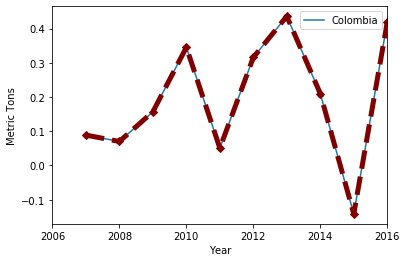

In [451]:
# Create a bar chart based off of the group series from before
colombia_line_chart = colombia_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = colombia_export.index
y_axis = colombia_export
# Set the xlabel and ylabel using class methods
colombia_line_chart.set_xlabel("Year")
colombia_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_colombia_line",bbox_inches="tight")

In [452]:
# Create the pandas DataFrame 
france_export = pd.DataFrame(summary_export_pct, columns = ['France'])
france_export

,France
Year,
2006,NaN
2007,7.715077
2008,0.742227
2009,-0.934719
2010,3.305647
2011,-0.188302
2012,-0.658896
2013,-0.725995
2014,0.334797


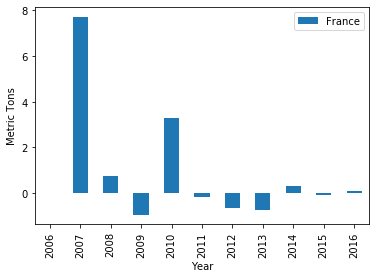

<Figure size 432x288 with 0 Axes>

In [453]:
# Create a bar chart based off of the group series from before
france_export_chart = france_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
france_export_chart.set_xlabel("Year")
france_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_france",bbox_inches="tight")
plt.show()
plt.tight_layout()

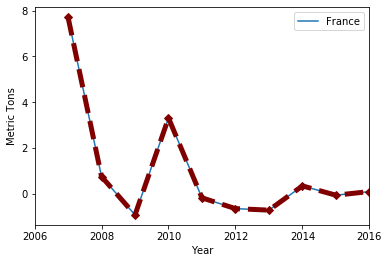

In [454]:
# Create a bar chart based off of the group series from before
france_line_chart = france_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = france_export.index
y_axis = france_export
# Set the xlabel and ylabel using class methods
france_line_chart.set_xlabel("Year")
france_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_france_line",bbox_inches="tight")

In [455]:
# Create the pandas DataFrame 
germany_export = pd.DataFrame(summary_export_pct, columns = ['Germany, Fed. Republic'])
germany_export

,"Germany, Fed. Republic"
Year,
2006,NaN
2007,0.673492
2008,0.796156
2009,-0.437523
2010,0.411062
2011,0.350359
2012,-0.075530
2013,-0.006613
2014,-0.149035


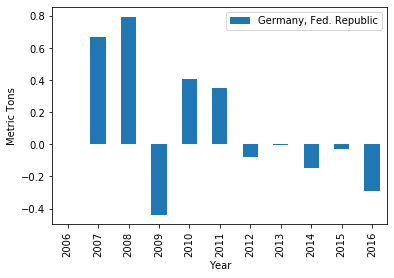

<Figure size 432x288 with 0 Axes>

In [456]:
# Create a bar chart based off of the group series from before
germany_export_chart = germany_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
germany_export_chart.set_xlabel("Year")
germany_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_germany",bbox_inches="tight")
plt.show()
plt.tight_layout()

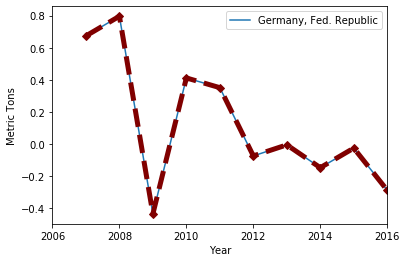

In [457]:
# Create a bar chart based off of the group series from before
germany_line_chart = germany_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = germany_export.index
y_axis = germany_export
# Set the xlabel and ylabel using class methods
germany_line_chart.set_xlabel("Year")
germany_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_germany_line",bbox_inches="tight")

In [458]:
# Create the pandas DataFrame 
greece_export = pd.DataFrame(summary_export_pct, columns = ['Greece'])
greece_export

,Greece
Year,
2006,NaN
2007,0.036201
2008,-0.244641
2009,0.327192
2010,-0.502216
2011,-0.471370
2012,-0.428098
2013,-0.395518
2014,-0.583463


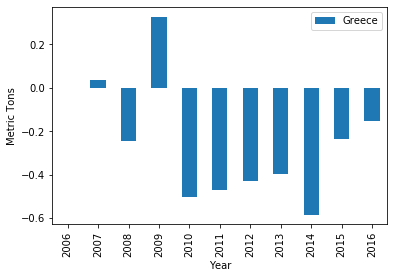

<Figure size 432x288 with 0 Axes>

In [459]:
# Create a bar chart based off of the group series from before
greece_export_chart = greece_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
greece_export_chart.set_xlabel("Year")
greece_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_greece",bbox_inches="tight")
plt.show()
plt.tight_layout()

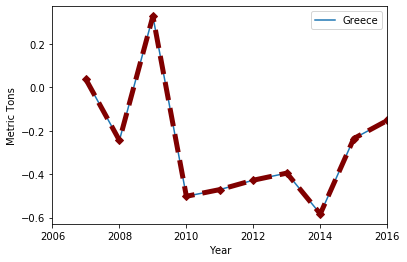

In [460]:
# Create a bar chart based off of the group series from before
greece_line_chart = greece_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = greece_export.index
y_axis = greece_export
# Set the xlabel and ylabel using class methods
greece_line_chart.set_xlabel("Year")
greece_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_greece_line",bbox_inches="tight")

In [461]:
# Create the pandas DataFrame 
india_export = pd.DataFrame(summary_export_pct, columns = ['India'])
india_export

,India
Year,
2006,NaN
2007,14.925406
2008,2.696898
2009,-0.169952
2010,1.145758
2011,-0.754158
2012,-0.555460
2013,-0.106173
2014,-0.707755


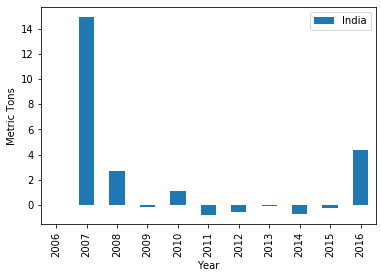

<Figure size 432x288 with 0 Axes>

In [462]:
# Create a bar chart based off of the group series from before
india_export_chart = india_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
india_export_chart.set_xlabel("Year")
india_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_india",bbox_inches="tight")
plt.show()
plt.tight_layout()

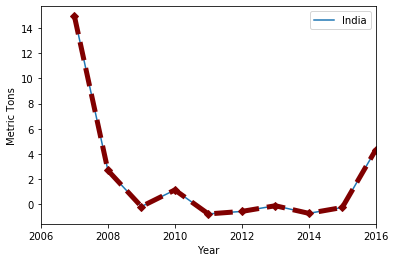

In [463]:
# Create a bar chart based off of the group series from before
india_line_chart = india_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = india_export.index
y_axis = india_export
# Set the xlabel and ylabel using class methods
india_line_chart.set_xlabel("Year")
india_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_india_line",bbox_inches="tight")

In [464]:
# Create the pandas DataFrame 
indonesia_export = pd.DataFrame(summary_export_pct, columns = ['Indonesia'])
indonesia_export

,Indonesia
Year,
2006,NaN
2007,-0.289598
2008,34.264077
2009,-0.424806
2010,1.104948
2011,0.504829
2012,-0.744969
2013,0.763521
2014,0.203714


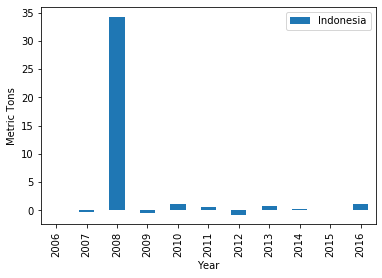

<Figure size 432x288 with 0 Axes>

In [465]:
# Create a bar chart based off of the group series from before
indonesia_export_chart = indonesia_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
indonesia_export_chart.set_xlabel("Year")
indonesia_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_indonesia",bbox_inches="tight")
plt.show()
plt.tight_layout()

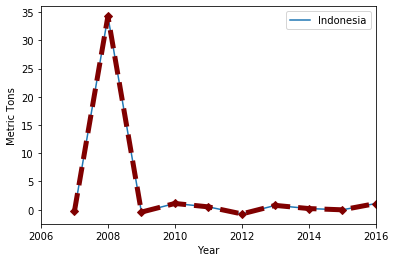

In [466]:
# Create a bar chart based off of the group series from before
indonesia_line_chart = indonesia_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = indonesia_export.index
y_axis = indonesia_export
# Set the xlabel and ylabel using class methods
indonesia_line_chart.set_xlabel("Year")
indonesia_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_indonesia_line",bbox_inches="tight")

In [467]:
# Create the pandas DataFrame 
italy_export = pd.DataFrame(summary_export_pct, columns = ['Italy'])
italy_export

,Italy
Year,
2006,NaN
2007,2.997971
2008,0.858240
2009,-0.453163
2010,1.159862
2011,0.153127
2012,-0.256049
2013,0.146907
2014,0.004773


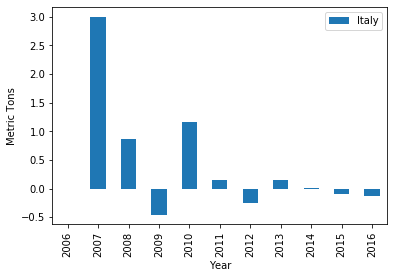

<Figure size 432x288 with 0 Axes>

In [468]:
# Create a bar chart based off of the group series from before
italy_export_chart = italy_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
italy_export_chart.set_xlabel("Year")
italy_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_italy",bbox_inches="tight")
plt.show()
plt.tight_layout()

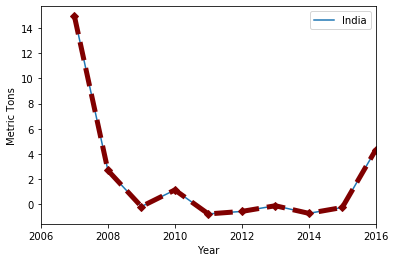

In [469]:
# Create a bar chart based off of the group series from before
india_line_chart = india_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = india_export.index
y_axis = india_export
# Set the xlabel and ylabel using class methods
india_line_chart.set_xlabel("Year")
india_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_india_line",bbox_inches="tight")

In [470]:
# Create the pandas DataFrame 
japan_export = pd.DataFrame(summary_export_pct, columns = ['Japan'])
japan_export

,Japan
Year,
2006,NaN
2007,0.139340
2008,0.261100
2009,-0.026362
2010,0.092121
2011,0.200512
2012,-0.088123
2013,0.090205
2014,0.067333


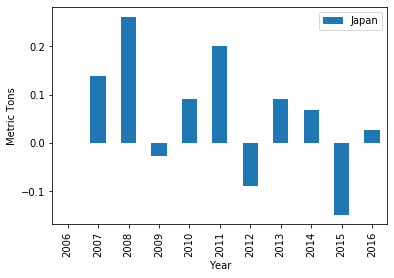

<Figure size 432x288 with 0 Axes>

In [471]:
# Create a bar chart based off of the group series from before
japan_export_chart = japan_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
japan_export_chart.set_xlabel("Year")
japan_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_japan",bbox_inches="tight")
plt.show()
plt.tight_layout()

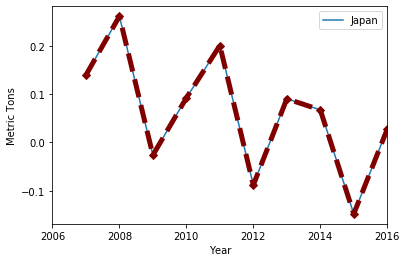

In [472]:
# Create a bar chart based off of the group series from before
japan_line_chart = japan_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = japan_export.index
y_axis = japan_export
# Set the xlabel and ylabel using class methods
japan_line_chart.set_xlabel("Year")
japan_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_japan_line",bbox_inches="tight")

In [473]:
# Create the pandas DataFrame 
mexico_export = pd.DataFrame(summary_export_pct, columns = ['Mexico'])
mexico_export

,Mexico
Year,
2006,NaN
2007,-0.099973
2008,0.288673
2009,0.057995
2010,0.084402
2011,0.042643
2012,0.081000
2013,0.098957
2014,0.115166


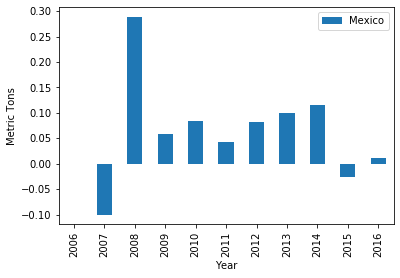

<Figure size 432x288 with 0 Axes>

In [474]:
# Create a bar chart based off of the group series from before
mexico_export_chart = mexico_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
mexico_export_chart.set_xlabel("Year")
mexico_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_mexico",bbox_inches="tight")
plt.show()
plt.tight_layout()

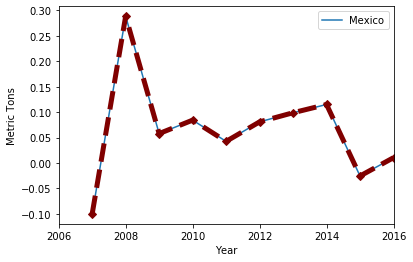

In [475]:
# Create a bar chart based off of the group series from before
mexico_line_chart = mexico_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = mexico_export.index
y_axis = mexico_export
# Set the xlabel and ylabel using class methods
mexico_line_chart.set_xlabel("Year")
mexico_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_mexico_line",bbox_inches="tight")

In [476]:
# Create the pandas DataFrame 
peru_export = pd.DataFrame(summary_export_pct, columns = ['Peru'])
peru_export

,Peru
Year,
2006,NaN
2007,1.481479
2008,-0.284967
2009,3.114113
2010,1.172260
2011,-0.093562
2012,0.658122
2013,0.138995
2014,-0.113501


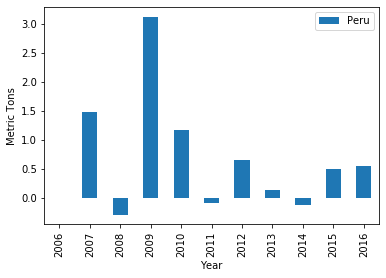

<Figure size 432x288 with 0 Axes>

In [477]:
# Create a bar chart based off of the group series from before
peru_export_chart = peru_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
peru_export_chart.set_xlabel("Year")
peru_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_peru",bbox_inches="tight")
plt.show()
plt.tight_layout()

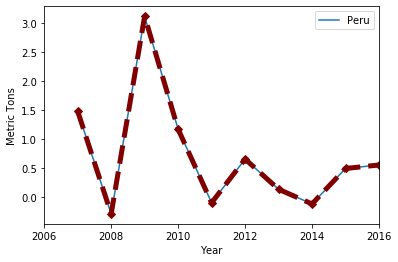

In [478]:
# Create a bar chart based off of the group series from before
peru_line_chart = peru_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = peru_export.index
y_axis = peru_export
# Set the xlabel and ylabel using class methods
peru_line_chart.set_xlabel("Year")
peru_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_peru_line",bbox_inches="tight")

In [479]:
# Create the pandas DataFrame 
poland_export = pd.DataFrame(summary_export_pct, columns = ['Poland'])
poland_export

,Poland
Year,
2006,NaN
2007,-0.854084
2008,-0.137801
2009,-0.088459
2010,-0.871491
2011,-0.964851
2012,-0.978682
2013,-0.472821
2014,0.000000


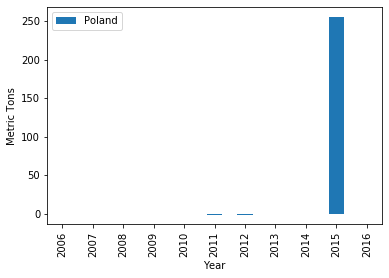

<Figure size 432x288 with 0 Axes>

In [480]:
# Create a bar chart based off of the group series from before
poland_export_chart = poland_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
poland_export_chart.set_xlabel("Year")
poland_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_poland",bbox_inches="tight")
plt.show()
plt.tight_layout()

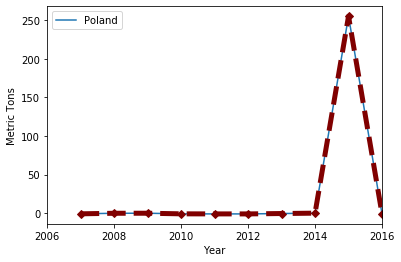

In [481]:
# Create a bar chart based off of the group series from before
poland_line_chart = poland_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = poland_export.index
y_axis = poland_export
# Set the xlabel and ylabel using class methods
poland_line_chart.set_xlabel("Year")
poland_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_poland_line",bbox_inches="tight")

In [482]:
# Create the pandas DataFrame 
saudi_export = pd.DataFrame(summary_export_pct, columns = ['Saudi Arabia'])
saudi_export

,Saudi Arabia
Year,
2006,NaN
2007,-0.147033
2008,1.174905
2009,-0.259622
2010,0.383495
2011,0.385261
2012,0.102408
2013,0.755527
2014,-0.305770


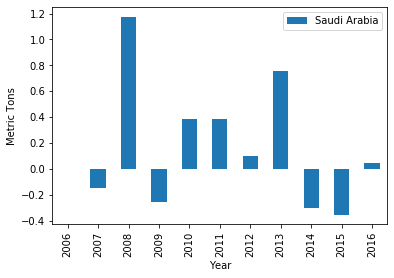

<Figure size 432x288 with 0 Axes>

In [483]:
# Create a bar chart based off of the group series from before
saudi_export_chart = saudi_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
saudi_export_chart.set_xlabel("Year")
saudi_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_saudi",bbox_inches="tight")
plt.show()
plt.tight_layout()

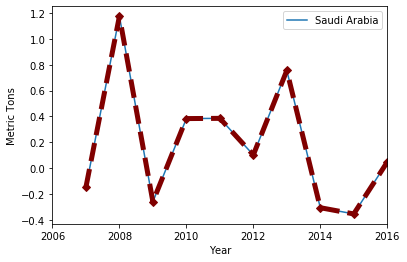

In [484]:
# Create a bar chart based off of the group series from before
saudi_line_chart = saudi_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = saudi_export.index
y_axis = saudi_export
# Set the xlabel and ylabel using class methods
saudi_line_chart.set_xlabel("Year")
saudi_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_saudi_line",bbox_inches="tight")

In [485]:
# Create the pandas DataFrame 
turkey_export = pd.DataFrame(summary_export_pct, columns = ['Turkey'])
turkey_export

,Turkey
Year,
2006,NaN
2007,-0.274590
2008,0.073158
2009,-0.135890
2010,-0.290141
2011,-0.054761
2012,0.511911
2013,-0.014458
2014,0.048511


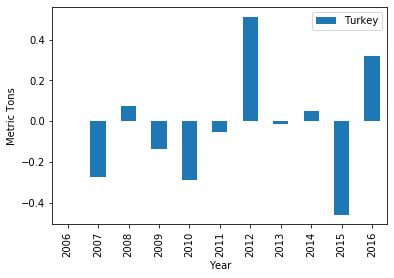

<Figure size 432x288 with 0 Axes>

In [486]:
# Create a bar chart based off of the group series from before
turkey_export_chart = turkey_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
turkey_export_chart.set_xlabel("Year")
turkey_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_turkey",bbox_inches="tight")
plt.show()
plt.tight_layout()

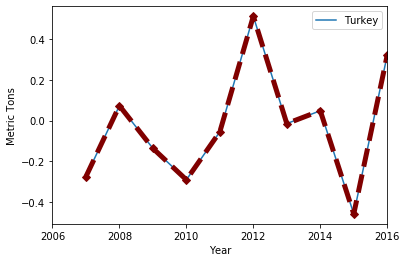

In [487]:
# Create a bar chart based off of the group series from before
turkey_line_chart = turkey_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = turkey_export.index
y_axis = turkey_export
# Set the xlabel and ylabel using class methods
turkey_line_chart.set_xlabel("Year")
turkey_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_turkey_line",bbox_inches="tight")

In [488]:
# Create the pandas DataFrame 
uk_export = pd.DataFrame(summary_export_pct, columns = ['United Kingdom'])
uk_export

,United Kingdom
Year,
2006,NaN
2007,0.053113
2008,1.291422
2009,-0.600438
2010,-0.384641
2011,-0.487360
2012,-0.271596
2013,0.158724
2014,0.030958


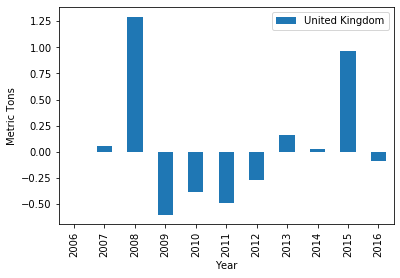

<Figure size 432x288 with 0 Axes>

In [489]:
# Create a bar chart based off of the group series from before
uk_export_chart = uk_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
uk_export_chart.set_xlabel("Year")
uk_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_uk",bbox_inches="tight")
plt.show()
plt.tight_layout()

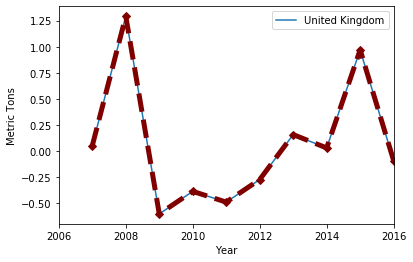

In [490]:
# Create a bar chart based off of the group series from before
uk_line_chart = uk_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = uk_export.index
y_axis = uk_export
# Set the xlabel and ylabel using class methods
uk_line_chart.set_xlabel("Year")
uk_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_uk_line",bbox_inches="tight")

In [491]:
# Create the pandas DataFrame 
zambia_export = pd.DataFrame(summary_export_pct, columns = ['Zambia'])
zambia_export

,Zambia
Year,
2006,NaN
2007,NaN
2008,1.445899
2009,0.000000
2010,-0.696934
2011,0.000000
2012,35.254181
2013,0.000000
2014,0.000000


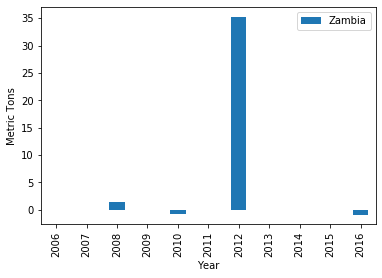

<Figure size 432x288 with 0 Axes>

In [492]:
# Create a bar chart based off of the group series from before
zambia_export_chart = zambia_export.plot(kind='bar')

# Set the xlabel and ylabel using class methods
zambia_export_chart.set_xlabel("Year")
zambia_export_chart.set_ylabel("Metric Tons")

plt.savefig("../exports_countries_graphs/exports_zambia",bbox_inches="tight")
plt.show()
plt.tight_layout()

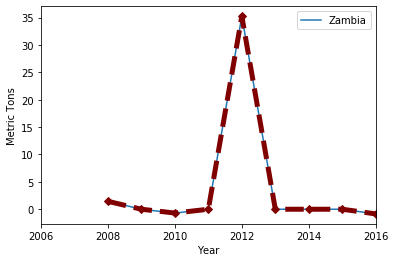

In [493]:
# Create a bar chart based off of the group series from before
zambia_line_chart = zambia_export.plot(kind='line')
color = "maroon"
marker = "o"

x_axis = zambia_export.index
y_axis = zambia_export
# Set the xlabel and ylabel using class methods
zambia_line_chart.set_xlabel("Year")
zambia_line_chart.set_ylabel("Metric Tons")


plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=5, linestyle='dashed', linewidth=5)
plt.savefig("../exports_countries_graphs/exports_zambia_line",bbox_inches="tight")

In [494]:
#group exports by country and year
summary_country_exports = new_export_df.groupby(["Country","Year"]).sum().reset_index()
summary_country_exports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,520149,24099437,6.971755e+05,21276.777788
1,Argentina,2007,429226,21334124,1.509824e+06,50093.451525
2,Argentina,2008,399269,18925406,8.081837e+05,26772.920599
3,Argentina,2009,215271,10629624,3.856750e+05,12562.097925
4,Argentina,2010,1172034,41546741,4.027077e+06,103482.865695


In [495]:
#group exports by country and year
summary_country_imports = new_import_df.groupby(["Country","Year"]).sum().reset_index()
summary_country_imports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06
1,Argentina,2007,30083,17998645,1.715963e+08,6.316710e+06
2,Argentina,2008,45504,18750702,1.390987e+08,5.112003e+06
3,Argentina,2009,71905,21202413,1.087845e+08,3.992219e+06
4,Argentina,2010,72326,14458465,1.070546e+08,3.923230e+06


In [496]:
# Merge our two data frames together
combined_summary_data = pd.merge(summary_country_imports, summary_country_exports, on="Country")
combined_summary_data.head()

,Country,Year_x,Unnamed: 0_x,Unnamed: 0.1_x,AMOUNT_x,Metric Tons_x,Year_y,Unnamed: 0_y,Unnamed: 0.1_y,AMOUNT_y,Metric Tons_y
0,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06,2006,520149,24099437,6.971755e+05,21276.777788
1,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06,2007,429226,21334124,1.509824e+06,50093.451525
2,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06,2008,399269,18925406,8.081837e+05,26772.920599
3,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06,2009,215271,10629624,3.856750e+05,12562.097925
4,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06,2010,1172034,41546741,4.027077e+06,103482.865695


In [497]:
# Delete unwanted columns
del combined_summary_data['AMOUNT_x']
combined_summary_data = combined_summary_data.rename(columns={"Year_x":"Year(Import)",
                                                              "Metric Tons_x":"Metric Tons(Import)",
                                                              "Year_y":"Year(Export)", 
                                                              "Metric Tons_y":"Metric Tons(Export)"})
combined_summary_data.head()

,Country,Year(Import),Unnamed: 0_x,Unnamed: 0.1_x,Metric Tons(Import),Year(Export),Unnamed: 0_y,Unnamed: 0.1_y,AMOUNT_y,Metric Tons(Export)
0,Argentina,2006,12403,22017679,7.824668e+06,2006,520149,24099437,6.971755e+05,21276.777788
1,Argentina,2006,12403,22017679,7.824668e+06,2007,429226,21334124,1.509824e+06,50093.451525
2,Argentina,2006,12403,22017679,7.824668e+06,2008,399269,18925406,8.081837e+05,26772.920599
3,Argentina,2006,12403,22017679,7.824668e+06,2009,215271,10629624,3.856750e+05,12562.097925
4,Argentina,2006,12403,22017679,7.824668e+06,2010,1172034,41546741,4.027077e+06,103482.865695


In [498]:
del combined_summary_data['Unnamed: 0_x']
combined_summary_data.head()

,Country,Year(Import),Unnamed: 0.1_x,Metric Tons(Import),Year(Export),Unnamed: 0_y,Unnamed: 0.1_y,AMOUNT_y,Metric Tons(Export)
0,Argentina,2006,22017679,7.824668e+06,2006,520149,24099437,6.971755e+05,21276.777788
1,Argentina,2006,22017679,7.824668e+06,2007,429226,21334124,1.509824e+06,50093.451525
2,Argentina,2006,22017679,7.824668e+06,2008,399269,18925406,8.081837e+05,26772.920599
3,Argentina,2006,22017679,7.824668e+06,2009,215271,10629624,3.856750e+05,12562.097925
4,Argentina,2006,22017679,7.824668e+06,2010,1172034,41546741,4.027077e+06,103482.865695


In [499]:
del combined_summary_data['Unnamed: 0.1_x']
combined_summary_data.head()

,Country,Year(Import),Metric Tons(Import),Year(Export),Unnamed: 0_y,Unnamed: 0.1_y,AMOUNT_y,Metric Tons(Export)
0,Argentina,2006,7.824668e+06,2006,520149,24099437,6.971755e+05,21276.777788
1,Argentina,2006,7.824668e+06,2007,429226,21334124,1.509824e+06,50093.451525
2,Argentina,2006,7.824668e+06,2008,399269,18925406,8.081837e+05,26772.920599
3,Argentina,2006,7.824668e+06,2009,215271,10629624,3.856750e+05,12562.097925
4,Argentina,2006,7.824668e+06,2010,1172034,41546741,4.027077e+06,103482.865695


In [500]:
del combined_summary_data['Unnamed: 0_y']
del combined_summary_data['Unnamed: 0.1_y']
del combined_summary_data['AMOUNT_y']
combined_summary_data

,Country,Year(Import),Metric Tons(Import),Year(Export),Metric Tons(Export)
0,Argentina,2006,7.824668e+06,2006,21276.777788
1,Argentina,2006,7.824668e+06,2007,50093.451525
2,Argentina,2006,7.824668e+06,2008,26772.920599
3,Argentina,2006,7.824668e+06,2009,12562.097925
4,Argentina,2006,7.824668e+06,2010,103482.865695
...,...,...,...,...,...
1249,United Kingdom,2016,1.665768e+06,2012,341479.393592
1250,United Kingdom,2016,1.665768e+06,2013,395680.238333
1251,United Kingdom,2016,1.665768e+06,2014,407929.763579
1252,United Kingdom,2016,1.665768e+06,2015,803317.864737


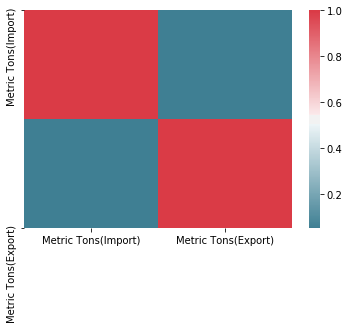

In [501]:
corr = combined_summary_data.loc[:,combined_summary_data.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [506]:
country_exports = pd.DataFrame(summary_country_exports, columns=['Country', 'Year', 'Metric Tons'])
country_exports

,Country,Year,Metric Tons
0,Argentina,2006,21276.777788
1,Argentina,2007,50093.451525
2,Argentina,2008,26772.920599
3,Argentina,2009,12562.097925
4,Argentina,2010,103482.865695
...,...,...,...
193,Zambia,2007,2000.741668
194,Zambia,2008,4893.611898
195,Zambia,2010,1483.087568
196,Zambia,2012,53768.125248


In [507]:
# selecting a single group 
new_country_export = country_exports.groupby('Country') 
new_country_export.get_group('Argentina')

,Country,Year,Metric Tons
0,Argentina,2006,21276.777788
1,Argentina,2007,50093.451525
2,Argentina,2008,26772.920599
3,Argentina,2009,12562.097925
4,Argentina,2010,103482.865695
5,Argentina,2011,88320.554998
6,Argentina,2012,2232.077556
7,Argentina,2013,5078.239160
8,Argentina,2014,36777.136642
9,Argentina,2015,274.914852


In [508]:
new_country_export.get_group('Argentina')

,Country,Year,Metric Tons
0,Argentina,2006,21276.777788
1,Argentina,2007,50093.451525
2,Argentina,2008,26772.920599
3,Argentina,2009,12562.097925
4,Argentina,2010,103482.865695
5,Argentina,2011,88320.554998
6,Argentina,2012,2232.077556
7,Argentina,2013,5078.239160
8,Argentina,2014,36777.136642
9,Argentina,2015,274.914852


In [509]:
total_export = pd.DataFrame(summary_export_pct, columns= ['Argentina', 'Australia', 'Bulgaria', 'China (Mainland)', 'Colombia', 'France', 'Germany, Fed. Republic', 'Greece', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Peru', 'Poland', 'Saudi Arabia', 'Turkey', 'United Kingdom', 'Zambia'])
total_export

,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,NaN
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


In [511]:
total_import = pd.DataFrame(summary_import_pct, columns = ['Argentina', 'Australia', 'China (Mainland)', 'Colombia', 'France', 'Germany, Fed. Republic', 'Greece', 'India', 'Italy', 'Japan', 'Mexico', 'Peru', 'Poland', 'United Kindgom'])
total_import

,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kindgom
Year,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.192718,0.009843,-0.492449,NaN,-0.610613,-0.488134,NaN,0.0,0.153532,2.081172,0.137898,NaN,0.154928,NaN
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,NaN,0.0,-0.036204,-0.731545,-0.204057,NaN,0.005786,NaN
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,NaN,0.0,-0.063439,-0.032049,0.135787,NaN,-0.040746,NaN
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,NaN,0.0,0.172179,-0.702514,0.464830,NaN,0.127193,NaN
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,NaN,0.0,0.075216,-0.954303,0.373189,NaN,-0.083048,NaN
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,NaN,0.0,0.267775,16.869376,0.449106,NaN,0.075659,NaN
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,NaN,0.0,0.036933,6.386284,-0.003730,NaN,0.166616,NaN
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,NaN,0.0,0.140652,1.538943,0.227116,NaN,0.873080,NaN


In [512]:
# for whole dataframe
total_import = total_import.replace(np.nan, 0)
total_import

,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kindgom
Year,,,,,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2007,-0.192718,0.009843,-0.492449,0.000000,-0.610613,-0.488134,0.0,0.0,0.153532,2.081172,0.137898,0.0,0.154928,0.0
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,0.0,0.0,-0.036204,-0.731545,-0.204057,0.0,0.005786,0.0
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,0.0,0.0,-0.063439,-0.032049,0.135787,0.0,-0.040746,0.0
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,0.0,0.0,0.172179,-0.702514,0.464830,0.0,0.127193,0.0
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,0.0,0.0,0.075216,-0.954303,0.373189,0.0,-0.083048,0.0
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,0.0,0.0,0.267775,16.869376,0.449106,0.0,0.075659,0.0
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,0.0,0.0,0.036933,6.386284,-0.003730,0.0,0.166616,0.0
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,0.0,0.0,0.140652,1.538943,0.227116,0.0,0.873080,0.0


In [513]:
# for whole dataframe
total_export = total_export.replace(np.nan, 0)
total_export

,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,0.000000
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


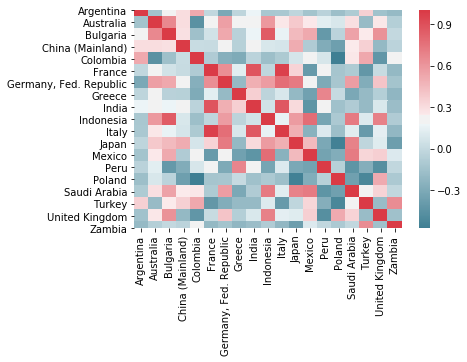

In [514]:
corr = total_export.loc[:,total_export.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

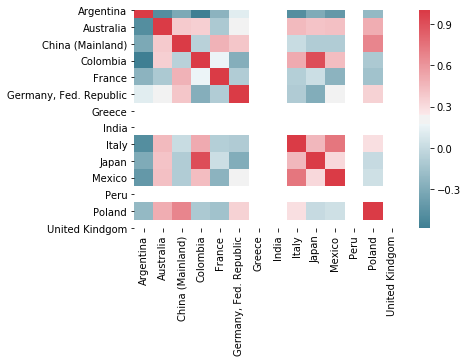

In [515]:
corr = total_import.loc[:,total_import.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))